<a href="https://colab.research.google.com/github/Jotin-Hirom/Pattern-Recognisation-Labs/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import test_data1.csv as ts

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kMeans = KMeans(n_clusters=3, random_state=11)
kMeans.fit(X)

# KMeans(algorithm='auto',copy_x=True,init='k-means++',max_iter=300,n_clusters=3,n_init=10,n_jobs = None, precompute_distance = 'auto',random_state= 11, tol=0.0001, verbose=0)

print (kMeans.labels_[:])

[0 0 2 1 1 1]


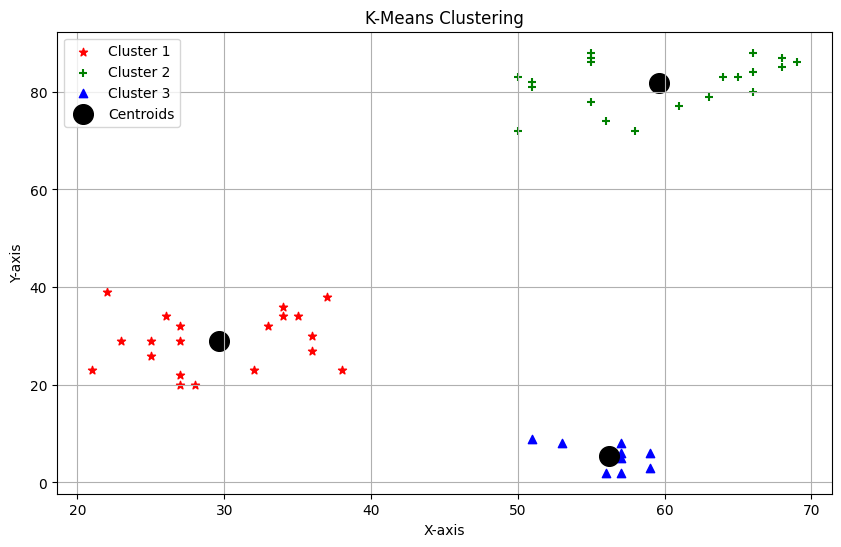

In [ ]:
import numpy as np
import xgboost as xgb
import random as rd
import csv
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


with open(file="test_data1.csv",mode="w",newline='') as test_data:
    writer = csv.writer(test_data)
    for i in range(0,40,2):
        a = rd.randrange(20,40)
        b = rd.randrange(20,40)
        writer.writerow([a,b])


    for j in range(50,90,2):
        a = rd.randrange(50,70)
        b = rd.randrange(70,90)
        writer.writerow([a,b])

    for k in range(50,60,1):
        a = rd.randrange(50,60)
        b = rd.randrange(0,10)
        writer.writerow([a,b])



    # X = np.array([[1, 2], [1, 4], [1, 0],
                  # [10, 2], [10, 4], [10, 0]])
with open(file="test_data1.csv", mode="r", newline='') as test_data:  # changed to mode 'r' for reading the data
    kMeans = KMeans(n_clusters=3, random_state=11)
    # Load data from the CSV file into a pandas DataFrame
    data = pd.read_csv('/content/test_data1.csv', header=None)
    # print(data)
    # print()
    # print()
    # Convert the DataFrame to a NumPy array
    X = data.values
    kMeans.fit(X)

    # KMeans(algorithm='auto',copy_x=True,init='k-means++',max_iter=300,n_clusters=3,n_init=10,n_jobs = None, precompute_distance = 'auto',random_state= 11, tol=0.0001, verbose=0)

    # print (kMeans.labels_[:])
    labels = kMeans.labels_
    centres = kMeans.cluster_centers_

    markers = ['*', '+', '^']
    colors = ['red','green','blue']

    plt.figure(figsize=(10, 6))

    # print(X)
    for i in range(3):
      cluster_data = X[labels == i]
      plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker=markers[i], color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centres[:, 0], centres[:, 1], marker='o', color='black', s=200, label='Centroids')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.grid(True)
    plt.show()




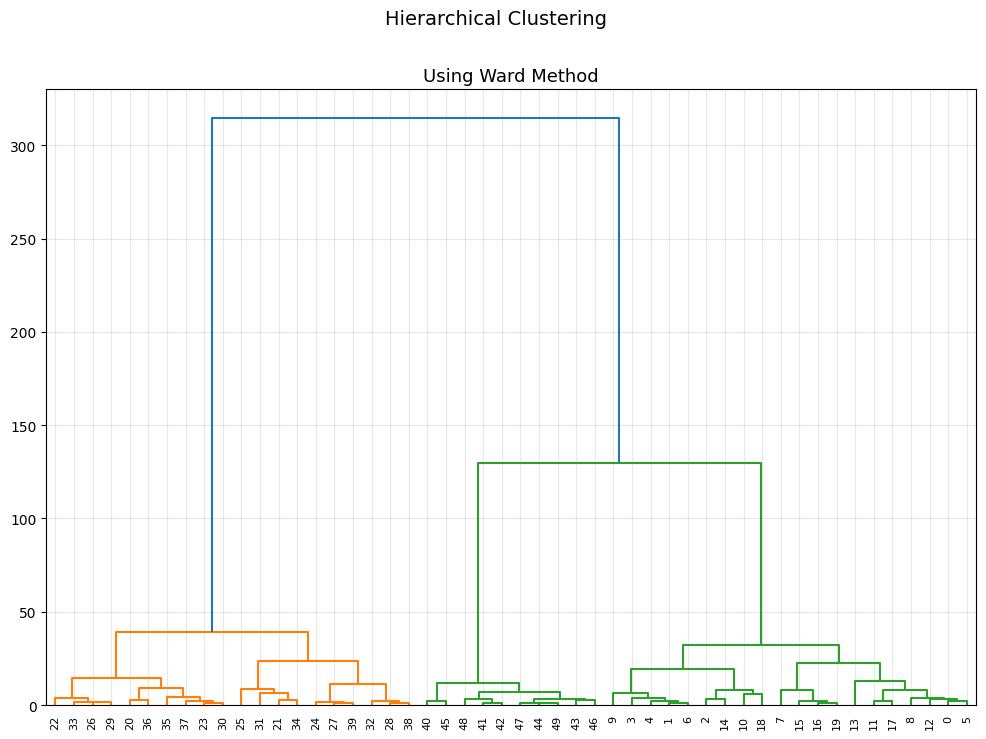

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
with open(file="test_data1.csv", mode="r", newline='') as test_data:  # changed to mode 'r' for reading the data
    # Load data from the CSV file into a pandas DataFrame
    data = pd.read_csv('/content/test_data1.csv', header=None)
    # Convert the DataFrame to a NumPy array
    X = data.values
    plt.figure(figsize=(12,8))
    linkage_data = linkage(X, method='ward', metric='euclidean')

    dendrogram(linkage_data)
    plt.suptitle("Hierarchical Clustering", fontsize=14)
    plt.title("Using Ward Method",fontsize=13)
    plt.grid(True, alpha=0.3)
    plt.show()

Cluster Assignments: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]


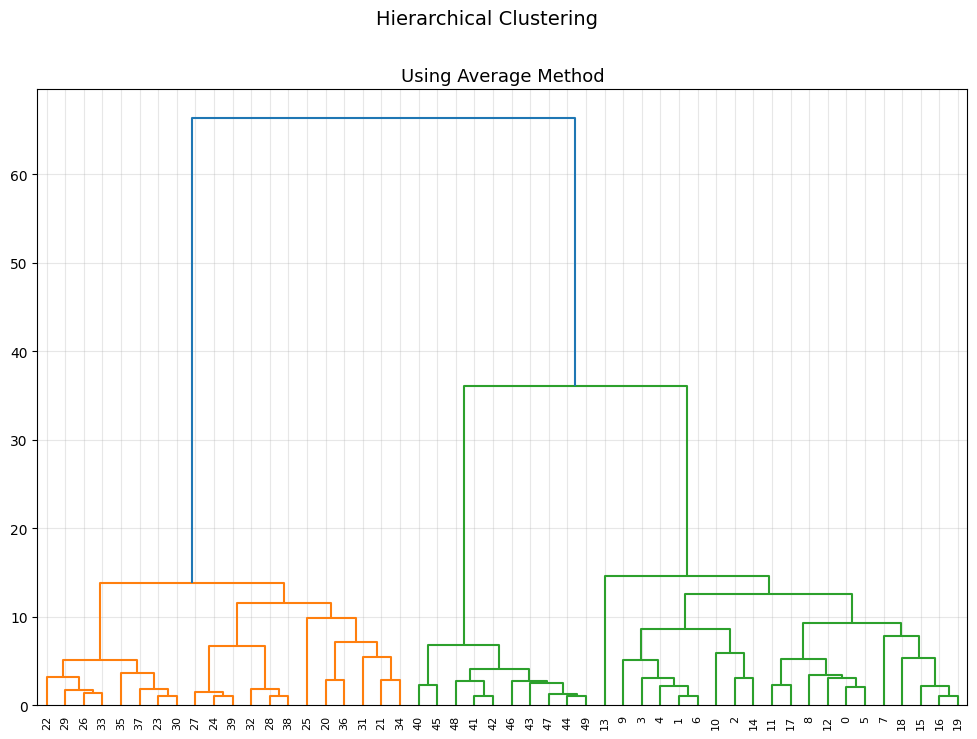

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster
with open(file="test_data1.csv", mode="r", newline='') as test_data:  # changed to mode 'r' for reading the data
    # Load data from the CSV file into a pandas DataFrame
    data = pd.read_csv('/content/test_data1.csv', header=None)
    # Convert the DataFrame to a NumPy array
    X = data.values
    plt.figure(figsize=(12,8))
    linkage_data = linkage(X, method='average', metric='mean')

    dendrogram(
        linkage_data,
        # color_threshold=23,  # Same as `t` in fcluster (adjust as needed)
        # above_threshold_color='gray'  # Color for unclustered branches
               )
    plt.suptitle("Hierarchical Clustering", fontsize=14)
    plt.title("Using Average Method",fontsize=13)
    plt.grid(True, alpha=0.3)

    # Cut the dendrogram to get clusters (e.g., at a distance of 20)
    clusters = fcluster(linkage_data, t=20, criterion='distance')

    # Print the cluster assignments for each data point
    print("Cluster Assignments:", clusters)
    plt.show()

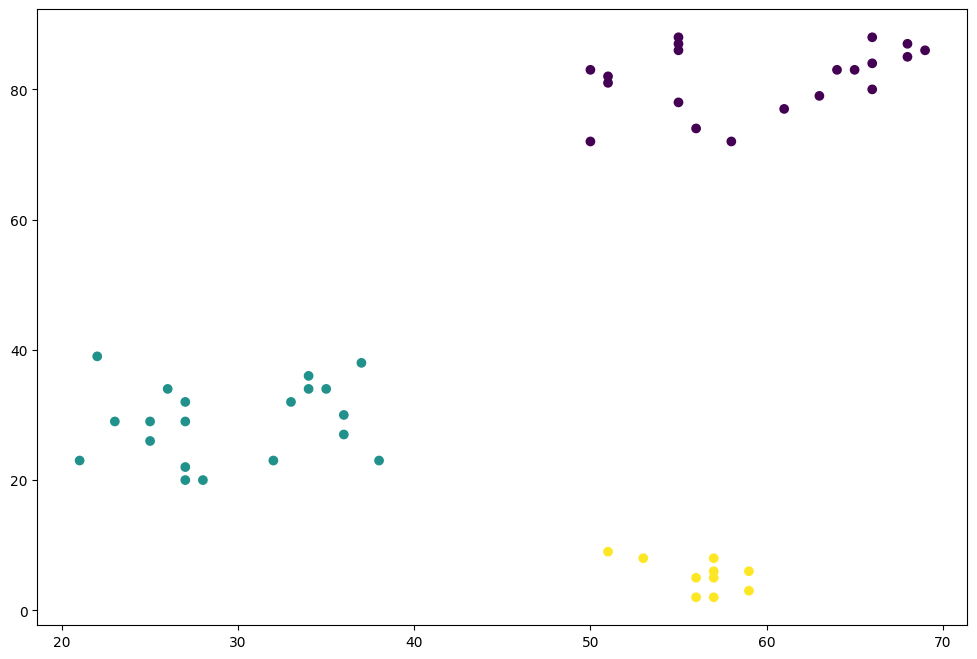

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster
from sklearn.cluster import AgglomerativeClustering
with open(file="test_data1.csv", mode="r", newline='') as test_data:  # changed to mode 'r' for reading the data
    # Load data from the CSV file into a pandas DataFrame
    data = pd.read_csv('/content/test_data1.csv', header=None)
    # Convert the DataFrame to a NumPy array
    X = data.values
    plt.figure(figsize=(12,8))

    hierarchical_cluster = AgglomerativeClustering(n_clusters=3,  linkage='ward')

    labels = hierarchical_cluster.fit_predict(data)

    plt.scatter(X[:,0],X[:,1], c=labels)
    plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(150, 4)


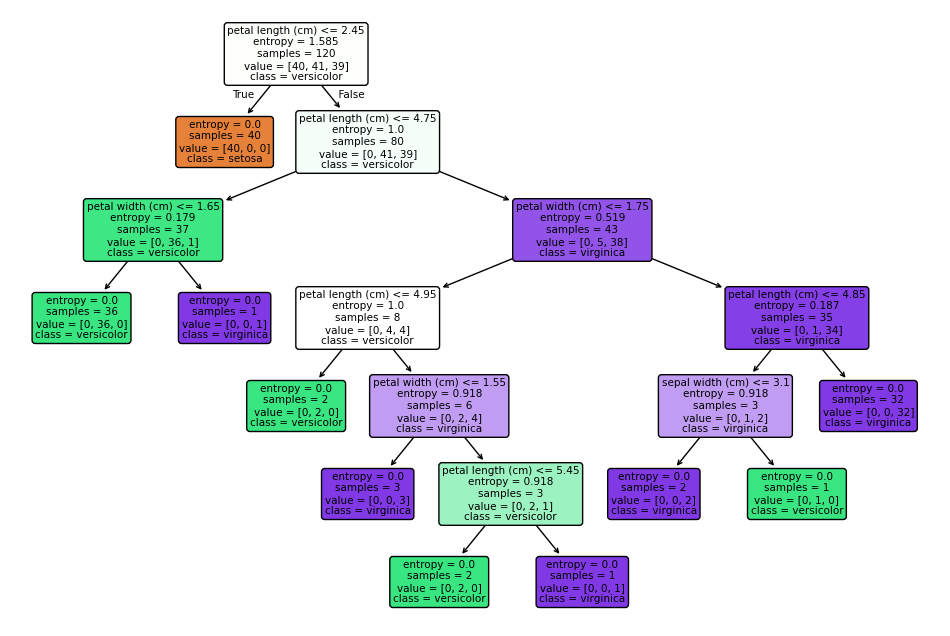

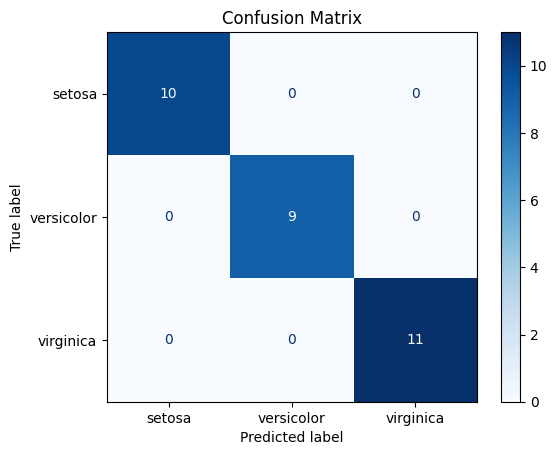

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Cross validation scores:

[1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean accuracy = 95.33% 


In [7]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


iris = load_iris()
print(iris.data.shape)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtree.fit(X_train, y_train)
predicted = dtree.predict(X_test)
expected=y_test
cm=confusion_matrix(y_true=expected, y_pred=predicted)
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(expected, predicted)
print(f"Accuracy = {accuracy:.2%}")

# Printing the classification report
report = classification_report(expected, predicted, target_names=iris.target_names)
print("Classification Report:\n")
print(report)

# k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(estimator=DecisionTreeClassifier(), X=iris.data, y=iris.target, cv=kf)
print("Cross validation scores:\n")
print(scores)

print(f'Mean accuracy = {scores.mean():.2%}; '+f'standard deviation = {scores.std():.2%}')



In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
wine = load_wine()
#print(wine.DESCR)
print(wine.data.shape)
X = wine.data
y = wine.target

estimators={
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(gamma='scale'),
    'Decision Tree': DecisionTreeClassifier()
}
for estimator_name, estimator_object in estimators.items():
      kf = KFold(n_splits=5, shuffle=True, random_state=42)
      scores = cross_val_score(estimator=estimator_object, X=wine.data, y=wine.target, cv=kf)
      print(f'{estimator_name:>20}; '+f'Mean accuracy = {scores.mean():.2%}; '+f'standard deviation = {scores.std():.2%}')

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
KNeighborsClassifier; Mean accuracy = 67.46%; standard deviation = 5.50%
                 SVC; Mean accuracy = 67.43%; standard deviation = 8.87%
       Decision Tree; Mean accuracy = 90.43%; standard deviation = 2.32%


(178, 13)


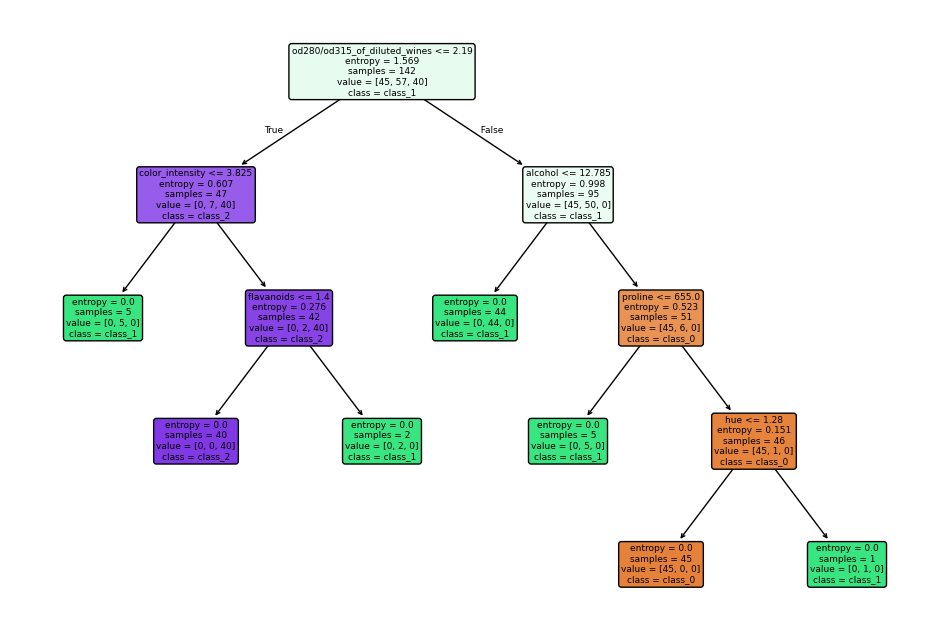

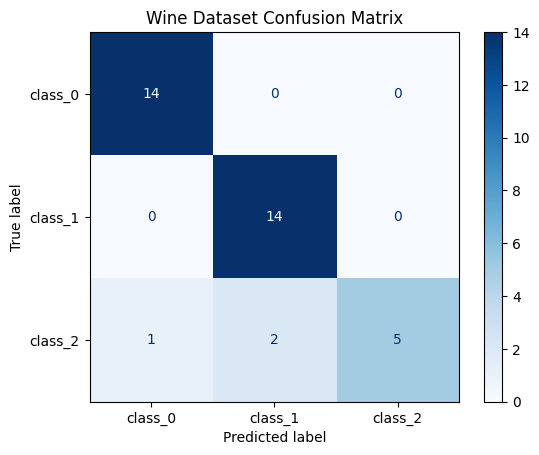

Accuracy = 91.67%
Classification Report:

              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



In [32]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

wine = load_wine()
print(wine.data.shape)
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtree.fit(X_train, y_train)
predicted = dtree.predict(X_test)
expected=y_test
cm=confusion_matrix(y_true=expected, y_pred=predicted)
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, filled=True, feature_names=wine.feature_names, class_names=wine.target_names, rounded=True)
plt.show()
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap='Blues')
plt.title("Wine Dataset Confusion Matrix")
plt.show()

#Display accuracy score
accuracy = accuracy_score(expected, predicted)
print(f"Accuracy = {accuracy:.2%}")

# Printing the classification report
report = classification_report(expected, predicted, target_names=wine.target_names)
print("Classification Report:\n")
print(report)




In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.data.shape)
X = wine.data
y = wine.target

print(wine.feature_names)
print(wine.target_names)
print()
print()

estimators={
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(gamma='scale'), #Low Gamma -> Far reach
    'Decision Tree': DecisionTreeClassifier()
}
for estimator_name, estimator_object in estimators.items():
      kf = KFold(n_splits=5, shuffle=True, random_state=42)
      scores = cross_val_score(estimator=estimator_object, X=wine.data, y=wine.target, cv=kf)
      c= 0
      for i in scores:
        print(i*100)
        c = c+i

      print("Accuracy: ")
      print(c)
      print("Mean Accuracy in 0-1 range : ")
      print(f'{c/5:.2}')
      print(f'{estimator_name:>20}; '+f'Mean accuracy = {scores.mean():.2%}; '+f'standard deviation = {scores.std():.2%}')
      print()


(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


72.22222222222221
61.111111111111114
61.111111111111114
68.57142857142857
74.28571428571429
Accuracy: 
3.3730158730158735
Mean Accuracy in 0-1 range : 
0.67
KNeighborsClassifier; Mean accuracy = 67.46%; standard deviation = 5.50%

80.55555555555556
55.55555555555556
63.888888888888886
74.28571428571429
62.857142857142854
Accuracy: 
3.3714285714285714
Mean Accuracy in 0-1 range : 
0.67
                 SVC; Mean accuracy = 67.43%; standard deviation = 8.87%

94.44444444444444
86.11111111111111
88.88888888888889
88.57142857142857
94.28571428571428
Accuracy: 
4.523015873015873
Mean Accuracy in 0-1 range : 
0.9
       Decision Tree; Mean accuracy = 90.46%; standard deviation = 3.33%

